# WeGo Public Transit
[WeGo Public Transit](https://www.wegotransit.com/) is a public transit system serving the Greater Nashville and Davidson County area. WeGo provides local and regional bus routes, the WeGo Star train service connecting Lebanon to downtown Nashville, along with several other transit services.

In this project, you'll be analyzing the bus spacing to look for patterns and try to identify correlations to controllable or external factors. Specifically, you'll be using a dataset containing information on the headway, or amount of time between vehicle arrivals at a stop. This dataset contains a column HDWY_DEV, which shows the headway deviation. This variable will be negative when bunching has occurred (shorter headway than scheduled) and will be positive for gapping (longer headway than scheduled). Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY.

Goals of this project:
1. How much impact does being late or too spaced out at the first stop have downstream?
2. What is the impact of the layover at the start of the trip (the difference between the first top arrival and departure time)? Does more layover lead to more stable headways (lower values for % headway deviation)?
3. How closely does lateness (ADHERENCE) correlate to headway?
4. What is the relationship between distance or time travelled since the start of a given trip and the headway deviation? Does headway become less stable the further along the route the bus has travelled?
5. How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.
6. How does direction of travel, route, or location affect the headway and on-time performance?
7. How does time of day or day of week affect headway and on-time performance? Can you detect an impact of school schedule on headway deviation (for certain routes and at certain times of day)?
8. Does weather have any effect on headway or on-time performance? To help answer this question, the file bna_weather.csv contains historical weather data recorded at Nashville International Airport. 

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#how to decode?
#check how to correctly specify pathway...
#Ask michael some clarifying q's on below.  Should've just run on pd.read_excel

#Original data read in.  Takes 2 mins, so converted to a CSV.
file_path='C:/Users/micha/Documents/NSS_Projects/wego-boooleans/data/Headway Data, 8-1-2023 to 9-30-2023.xlsx'
df_hw = pd.read_excel(file_path)
df_hw

df_hw.to_csv('wego_data_1.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#Route 7 is three out and three back
#Route 22 is four out and three back

In [41]:
df_hw = pd.read_csv('wego_data_1.csv', index_col=False)
#df_hw.drop(columns=['Unnamed: 0'], inplace=True, axis=1)
df_hw['PERC_HDWY'] = (df_hw['HDWY_DEV']/df_hw['SCHEDULED_HDWY'])
df_hw.loc[30:100]

,Unnamed: 0,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PERC_HDWY
30,30,120230801,1,99457920,2023-08-01,22,2200,1040,345112,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,09:10:00,09:05:34,09:05:34,4.433333,NaN,NaN,NaN,0,0,1,0,NaN,0,280,0.000000,NaN
31,31,120230801,1,99457921,2023-08-01,22,2200,1040,345113,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,09:15:00,09:05:34,09:16:27,-1.450000,15.0,14.600000,-0.400000,0,0,1,0,0.0,0,281,10.883333,-0.026667
32,32,120230801,1,99457922,2023-08-01,22,2200,1040,345113,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,09:26:00,09:24:44,09:24:44,1.266666,16.0,10.483333,-5.516667,1,0,0,0,0.0,0,296,0.000000,-0.344792
33,33,120230801,1,99457923,2023-08-01,22,2200,1040,345113,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,09:36:00,09:33:50,09:33:50,2.166666,NaN,NaN,NaN,0,0,1,0,NaN,0,307,0.000000,NaN
34,34,120230801,1,99457924,2023-08-01,22,2200,1040,345114,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,09:40:00,09:33:50,09:42:42,-2.700000,55.0,55.100000,0.100000,0,0,1,0,0.0,0,308,8.866666,0.001818
35,35,120230801,1,99457925,2023-08-01,22,2200,1040,345114,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,09:49:00,09:50:29,09:50:29,-1.483333,12.0,11.316666,-0.683334,0,0,1,0,0.0,0,324,0.000000,-0.056945
36,36,120230801,1,99457926,2023-08-01,22,2200,1040,345114,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,10:05:00,09:59:22,09:59:22,5.633333,NaN,NaN,NaN,0,0,1,0,NaN,0,340,0.000000,NaN
37,37,120230801,1,99457927,2023-08-01,22,2200,1040,345115,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,10:10:00,09:59:22,10:11:05,-1.083333,12.0,10.333333,-1.666667,0,0,1,0,0.0,0,341,11.716666,-0.138889
38,38,120230801,1,99457928,2023-08-01,22,2200,1040,345115,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,10:21:00,10:19:07,10:19:07,1.883333,12.0,8.850000,-3.150000,1,0,0,0,0.0,0,356,0.000000,-0.262500
39,39,120230801,1,99457929,2023-08-01,22,2200,1040,345115,0,FROM DOWNTOWN,CLFF,9.0,2,36.192856,-86.828554,10:25:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,0,362,NaN,NaN


In [39]:
df_hw.loc[30:100]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
30,120230801,1,99457920,2023-08-01,22,2200,1040,345112,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,09:10:00,09:05:34,09:05:34,4.433333,NaN,NaN,NaN,0,0,1,0,NaN,0,280,0.000000
31,120230801,1,99457921,2023-08-01,22,2200,1040,345113,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,09:15:00,09:05:34,09:16:27,-1.450000,15.0,14.600000,-0.400000,0,0,1,0,0.0,0,281,10.883333
32,120230801,1,99457922,2023-08-01,22,2200,1040,345113,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,09:26:00,09:24:44,09:24:44,1.266666,16.0,10.483333,-5.516667,1,0,0,0,0.0,0,296,0.000000
33,120230801,1,99457923,2023-08-01,22,2200,1040,345113,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,09:36:00,09:33:50,09:33:50,2.166666,NaN,NaN,NaN,0,0,1,0,NaN,0,307,0.000000
34,120230801,1,99457924,2023-08-01,22,2200,1040,345114,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,09:40:00,09:33:50,09:42:42,-2.700000,55.0,55.100000,0.100000,0,0,1,0,0.0,0,308,8.866666
35,120230801,1,99457925,2023-08-01,22,2200,1040,345114,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,09:49:00,09:50:29,09:50:29,-1.483333,12.0,11.316666,-0.683334,0,0,1,0,0.0,0,324,0.000000
36,120230801,1,99457926,2023-08-01,22,2200,1040,345114,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,10:05:00,09:59:22,09:59:22,5.633333,NaN,NaN,NaN,0,0,1,0,NaN,0,340,0.000000
37,120230801,1,99457927,2023-08-01,22,2200,1040,345115,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,10:10:00,09:59:22,10:11:05,-1.083333,12.0,10.333333,-1.666667,0,0,1,0,0.0,0,341,11.716666
38,120230801,1,99457928,2023-08-01,22,2200,1040,345115,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,10:21:00,10:19:07,10:19:07,1.883333,12.0,8.850000,-3.150000,1,0,0,0,0.0,0,356,0.000000
39,120230801,1,99457929,2023-08-01,22,2200,1040,345115,0,FROM DOWNTOWN,CLFF,9.0,2,36.192856,-86.828554,10:25:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,0,362,NaN


In [7]:
#shapiro_wilks or anderson_darling

In [8]:
df_corr1 = df_hw['ADHERENCE'].corr(df_hw['ACTUAL_HDWY'])
df_corr1

-0.07471899346736784

In [9]:
df_hw.head(2)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PER_HDWY
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,04:42:00,04:37:38,04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,2,6.5,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,04:46:00,04:48:27,04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,9,0.0,NaN


In [10]:
#Get basic data types.
df_hw.dtypes

CALENDAR_ID                    int64
SERVICE_ABBR                   int64
ADHERENCE_ID                   int64
DATE                          object
ROUTE_ABBR                     int64
BLOCK_ABBR                     int64
OPERATOR                       int64
TRIP_ID                        int64
OVERLOAD_ID                    int64
ROUTE_DIRECTION_NAME          object
TIME_POINT_ABBR               object
ROUTE_STOP_SEQUENCE          float64
TRIP_EDGE                      int64
LATITUDE                     float64
LONGITUDE                    float64
SCHEDULED_TIME                object
ACTUAL_ARRIVAL_TIME           object
ACTUAL_DEPARTURE_TIME         object
ADHERENCE                    float64
SCHEDULED_HDWY               float64
ACTUAL_HDWY                  float64
HDWY_DEV                     float64
ADJUSTED_EARLY_COUNT           int64
ADJUSTED_LATE_COUNT            int64
ADJUSTED_ONTIME_COUNT          int64
STOP_CANCELLED                 int64
PREV_SCHED_STOP_CANCELLED    float64
I

In [11]:
#If route ABBR are just the abbreviations to the routes, there are only 8?
df_hw.value_counts('ROUTE_ABBR')

ROUTE_ABBR
55    61944
56    60020
52    51819
3     47162
50    43291
23    42108
22    25958
7     18026
dtype: int64

In [12]:
df_hw.value_counts('TRIP_ID')

TRIP_ID
353036    294
352988    294
352287    294
352940    294
353000    287
         ... 
348483      9
348484      9
348485      9
348486      9
345395      9
Length: 3987, dtype: int64

In [13]:
#Headway deviation = amount of time between vehicle arrivals at a stop.  This variable will be negative when bunching 
#has occurred (shorter headway than scheduled) and will be positive for gapping (longer headway than scheduled).
df_hw.value_counts('HDWY_DEV')

HDWY_DEV
 0.000000      760
 0.016666      699
-0.100000      660
-0.016667      640
-0.116667      619
              ... 
 32.483333       1
 32.533333       1
 32.550000       1
 32.566666       1
 565.433333      1
Length: 4217, dtype: int64

In [14]:
df_hw.value_counts('BLOCK_ABBR')

BLOCK_ABBR
300     8894
2312    8532
2310    8233
5003    8086
5004    8048
        ... 
6401      72
8405      72
8604      72
9302      72
9975      72
Length: 102, dtype: int64

In [15]:
#Only two variables from dwntn, to dwntn.  This is because all the routes originate from main station for this project?
df_hw.value_counts('ROUTE_DIRECTION_NAME')

ROUTE_DIRECTION_NAME
FROM DOWNTOWN    185792
TO DOWNTOWN      164536
dtype: int64

In [16]:
pd.set_option('display.max_rows', 500)

In [17]:
#Q's
#What is BLOCK_ABBR?
#IS ROUTE_ABBR actually the route? or something else.  Did MTA run 50 runs of 7 on 8-1-2023?
#Destination	
#HILLSBORO TRANSIT CENTER  21ST AVE S & CHILDRENS WAY   NB CENTRAL 5TH AVE - BAY 9   CENTRAL 4TH AVE - BAY 20
#DOWNTOWN	5:46 AM	             5:54 AM	                    6:10 AM	-
#Where are bus times? are they included here?
#

In [18]:
#NaN is if there's no HDWY_DEV
df7 = df_hw[(df_hw['ROUTE_ABBR'] == 7) & (df_hw['DATE'] == '2023-08-01')]
df7

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PER_HDWY
2123,120230801,1,99460956,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,14:31:00,14:31:27,14:31:27,-0.450000,15.0,1.150000,-13.850000,0,0,1,0,0.0,0,2,0.000000,-92.333333
2124,120230801,1,99460957,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,14:41:00,14:46:54,14:46:54,-5.900000,15.0,5.950000,-9.050000,0,0,1,0,0.0,0,11,0.000000,-60.333333
2125,120230801,1,99460958,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,MCC5_12,2.0,2,36.167091,-86.781923,15:00:00,15:05:41,15:05:41,-5.683333,NaN,NaN,NaN,0,0,1,0,NaN,0,23,0.000000,NaN
6134,120230801,1,99465615,2023-08-01,7,700,3144,348421,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,05:15:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.0,0,2,NaN,NaN
6135,120230801,1,99465616,2023-08-01,7,700,3144,348421,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,05:28:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.0,0,13,NaN,NaN
6136,120230801,1,99465617,2023-08-01,7,700,3144,348421,0,FROM DOWNTOWN,HBHS,5.0,2,36.107575,-86.812719,05:40:00,05:09:44,05:09:44,30.266666,NaN,NaN,NaN,0,0,1,0,NaN,0,27,0.000000,NaN
6137,120230801,1,99465618,2023-08-01,7,700,3144,348422,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,05:46:00,05:09:44,05:11:45,34.250000,NaN,NaN,NaN,1,0,0,0,0.0,0,28,2.016666,NaN
6138,120230801,1,99465619,2023-08-01,7,700,3144,348422,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,05:54:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.0,0,37,NaN,NaN
6139,120230801,1,99465620,2023-08-01,7,700,3144,348422,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,06:10:00,05:20:00,05:20:00,50.000000,NaN,NaN,NaN,1,0,0,0,NaN,0,49,0.000000,NaN
6140,120230801,1,99465621,2023-08-01,7,700,3144,348423,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,06:15:00,05:20:00,05:27:29,47.516666,10.0,NaN,NaN,1,0,0,0,0.0,0,50,7.483333,NaN


In [19]:
#For route 7 on 8-1-2023, there were 211 HDWY_DEV recorded
#211/330 = 64% of the time there was a deviance issue 
#max=20.77
#min=-19.167
df7.describe()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PER_HDWY
count,330.0,330.0,3.300000e+02,330.0,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,309.000000,216.000000,211.000000,211.000000,330.000000,330.000000,330.000000,330.000000,220.000000,330.000000,330.000000,309.000000,211.000000
mean,120230801.0,1.0,9.946574e+07,7.0,733.509091,1819.906061,348550.481818,0.009091,3.996970,0.996970,36.137767,-86.798421,5.059008,20.675926,21.161532,0.303712,0.130303,0.172727,0.633333,0.009091,0.009091,0.027273,235.472727,3.883603,1.466343
std,0.0,0.0,4.690609e+02,0.0,323.042341,957.800438,196.701032,0.095056,0.823288,0.819587,0.024342,0.012688,23.904244,7.749963,10.418815,6.909897,0.337148,0.378585,0.482626,0.095056,0.095128,0.163124,159.077357,6.804444,37.540710
min,120230801.0,1.0,9.946096e+07,7.0,700.000000,341.000000,346716.000000,0.000000,2.000000,0.000000,36.107575,-86.812719,-22.783333,10.000000,0.833333,-19.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,-95.833335
25%,120230801.0,1.0,9.946570e+07,7.0,701.000000,723.000000,348488.000000,0.000000,3.000000,0.000000,36.107575,-86.812719,-4.316666,15.000000,14.450000,-2.658333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,97.000000,0.000000,-11.805557
50%,120230801.0,1.0,9.946578e+07,7.0,703.000000,2164.000000,348615.500000,0.000000,4.000000,1.000000,36.138881,-86.800622,-1.716666,20.000000,19.900000,0.016666,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,220.000000,0.000000,0.083330
75%,120230801.0,1.0,9.946587e+07,7.0,704.000000,2500.000000,348643.000000,0.000000,5.000000,2.000000,36.167091,-86.781923,-0.116666,20.000000,27.766666,2.358333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,356.500000,6.750000,10.598288
max,120230801.0,1.0,9.946595e+07,7.0,4101.000000,3144.000000,348670.000000,1.000000,5.000000,2.000000,36.167091,-86.781923,88.383333,60.000000,71.483333,20.766666,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,625.000000,37.883333,138.444440


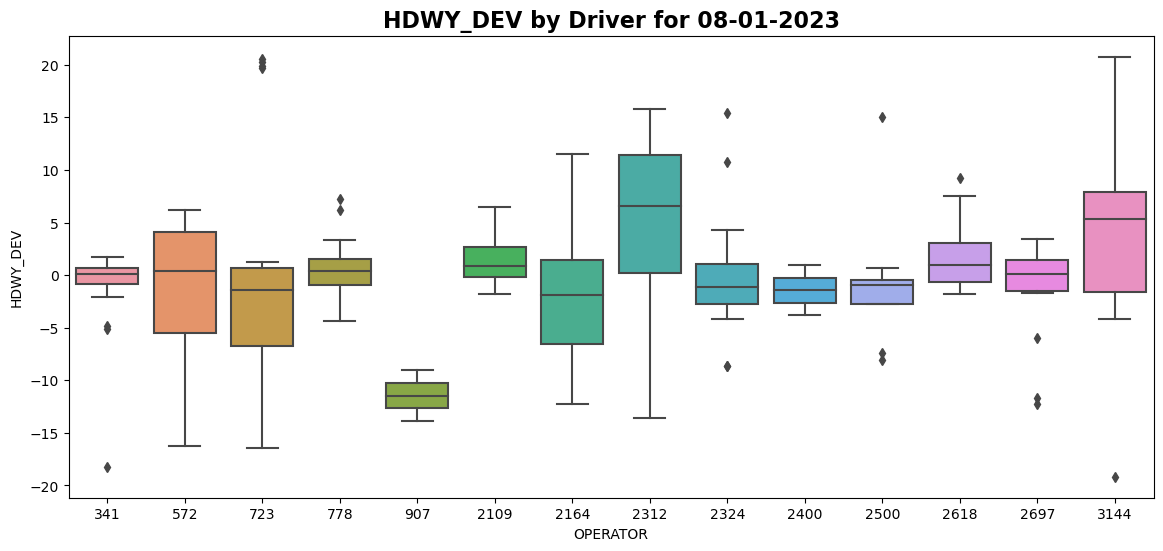

In [20]:
fontsize = 16

plt.subplots(figsize = (14, 6))
sns.boxplot(data = df7, x = 'OPERATOR', y = 'HDWY_DEV');
plt.title('HDWY_DEV by Driver for 08-01-2023', fontsize = fontsize, fontweight = 'bold');

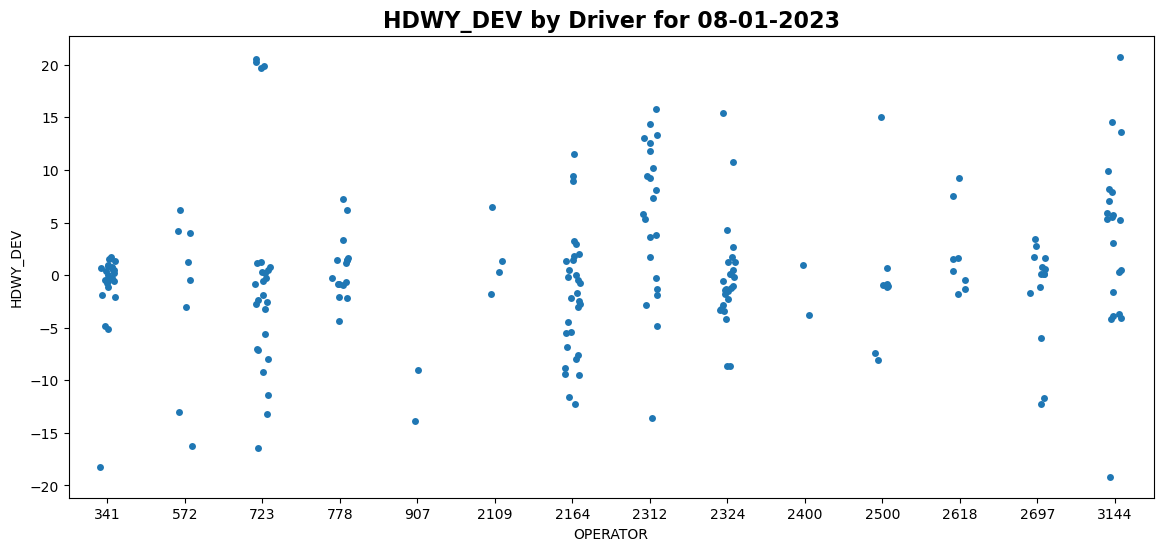

In [21]:
fontsize = 16

plt.subplots(figsize = (14, 6))
sns.stripplot(data = df7, x = 'OPERATOR', y = 'HDWY_DEV');
plt.title('HDWY_DEV by Driver for 08-01-2023', fontsize = fontsize, fontweight = 'bold');

In [22]:
#Comparisons of drivers on 08-01-2023
#907 30 entries
#314 35 entries
#3144 39 entries
#778 24 entires
#df7   = df_hw[(df_hw['ROUTE_ABBR'] == 7) & (df_hw['DATE'] == '2023-08-01')]
df907 = df_hw[(df_hw['OPERATOR'] == 907) & (df_hw['DATE'] == '2023-08-01' )]
df907


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PER_HDWY
2123,120230801,1,99460956,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,14:31:00,14:31:27,14:31:27,-0.450000,15.0,1.15,-13.85,0,0,1,0,0.0,0,2,0.0,-92.333333
2124,120230801,1,99460957,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,14:41:00,14:46:54,14:46:54,-5.900000,15.0,5.95,-9.05,0,0,1,0,0.0,0,11,0.0,-60.333333
2125,120230801,1,99460958,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,MCC5_12,2.0,2,36.167091,-86.781923,15:00:00,15:05:41,15:05:41,-5.683333,NaN,NaN,NaN,0,0,1,0,NaN,0,23,0.0,NaN


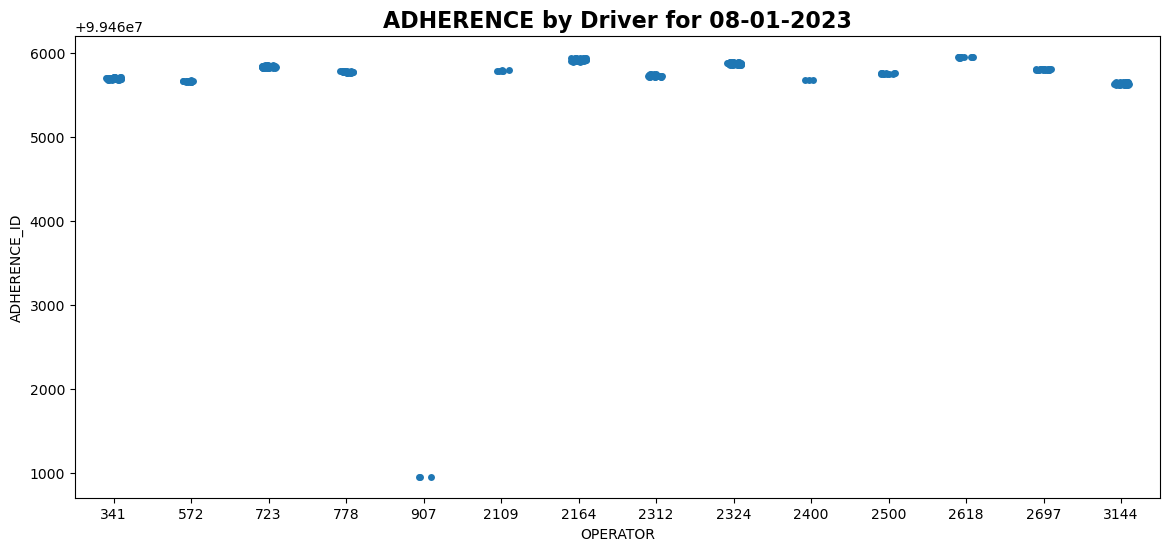

In [23]:
fontsize = 16

plt.subplots(figsize = (14, 6))
sns.stripplot(data = df7, x = 'OPERATOR', y = 'ADHERENCE_ID');
plt.title('ADHERENCE by Driver for 08-01-2023', fontsize = fontsize, fontweight = 'bold');

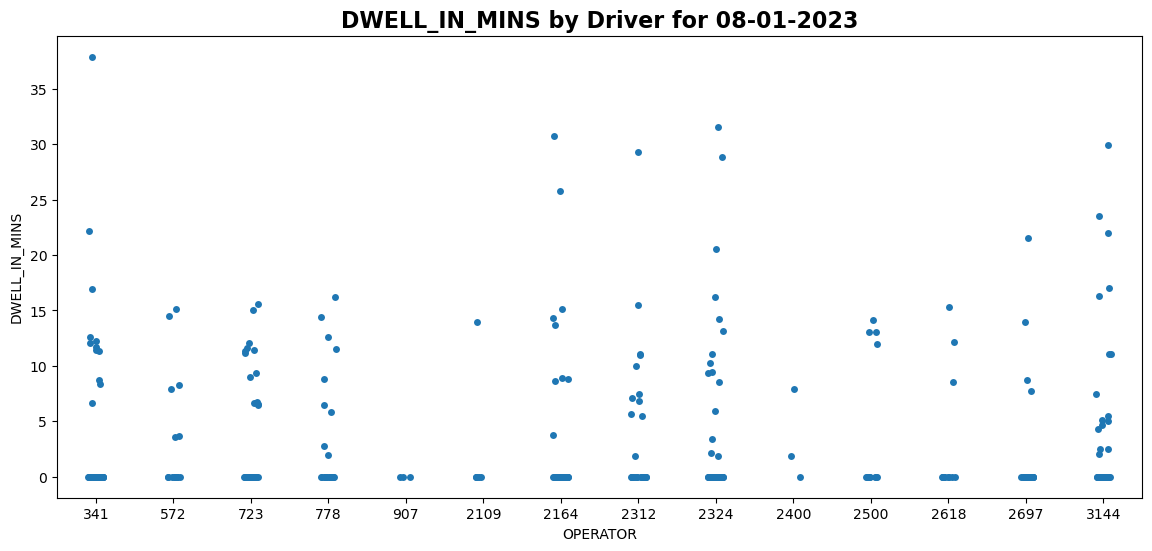

In [24]:
fontsize = 16

plt.subplots(figsize = (14, 6))
sns.stripplot(data = df7, x = 'OPERATOR', y = 'DWELL_IN_MINS');
plt.title('DWELL_IN_MINS by Driver for 08-01-2023', fontsize = fontsize, fontweight = 'bold');

In [25]:
df55 = df_hw[(df_hw['ROUTE_ABBR'] == 55) & (df_hw['DATE'] == '2023-08-01')]
df55


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PER_HDWY
3853,120230801,1,99462915,2023-08-01,55,5500,1206,347480,0,TO DOWNTOWN,HHWM,11.0,1,36.052637,-86.654878,04:23:00,04:14:25,04:23:54,-0.900000,NaN,NaN,NaN,0,0,1,0,0.0,0,2,9.483333,NaN
3854,120230801,1,99462916,2023-08-01,55,5500,1206,347480,0,TO DOWNTOWN,MXBELL,10.0,0,36.072852,-86.636862,04:30:00,04:30:37,04:30:37,-0.616666,NaN,NaN,NaN,0,0,1,0,0.0,0,9,0.000000,NaN
3855,120230801,1,99462917,2023-08-01,55,5500,1206,347480,0,TO DOWNTOWN,MXDONEL,9.0,0,36.106276,-86.672801,04:37:00,04:39:14,04:39:14,-2.233333,NaN,NaN,NaN,0,0,1,0,0.0,0,18,0.000000,NaN
3856,120230801,1,99462918,2023-08-01,55,5500,1206,347480,0,TO DOWNTOWN,MXTHOMP,8.0,0,36.127172,-86.711441,04:44:00,04:44:44,04:44:44,-0.733333,NaN,NaN,NaN,0,0,1,0,0.0,0,23,0.000000,NaN
3857,120230801,1,99462919,2023-08-01,55,5500,1206,347480,0,TO DOWNTOWN,MXWHARF,6.0,0,36.148860,-86.762226,04:54:00,04:56:17,04:56:17,-2.283333,NaN,NaN,NaN,0,0,1,0,0.0,0,33,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,120230801,1,99464086,2023-08-01,55,5593,1505,347900,0,TO DOWNTOWN,MXWHARF,6.0,0,36.148860,-86.762226,06:55:00,06:56:33,06:56:33,-1.550000,5.0,0.750000,-4.250000,0,0,1,0,0.0,0,12,0.000000,-85.00000
4995,120230801,1,99464087,2023-08-01,55,5593,1505,347900,0,TO DOWNTOWN,MCC4_15,5.0,2,36.167091,-86.781923,07:10:00,07:09:56,07:09:56,0.066666,NaN,NaN,NaN,0,0,1,0,NaN,0,22,0.000000,NaN
4996,120230801,1,99464090,2023-08-01,55,5594,1619,347901,0,TO DOWNTOWN,MXTHOMP,8.0,1,36.127172,-86.711441,07:03:00,07:02:54,07:02:54,0.100000,5.0,4.733333,-0.266667,0,0,1,0,0.0,0,2,0.000000,-5.33334
4997,120230801,1,99464091,2023-08-01,55,5594,1619,347901,0,TO DOWNTOWN,MXWHARF,6.0,0,36.148860,-86.762226,07:15:00,07:16:26,07:16:26,-1.433333,5.0,7.266666,2.266666,0,0,1,0,0.0,0,12,0.000000,45.33332


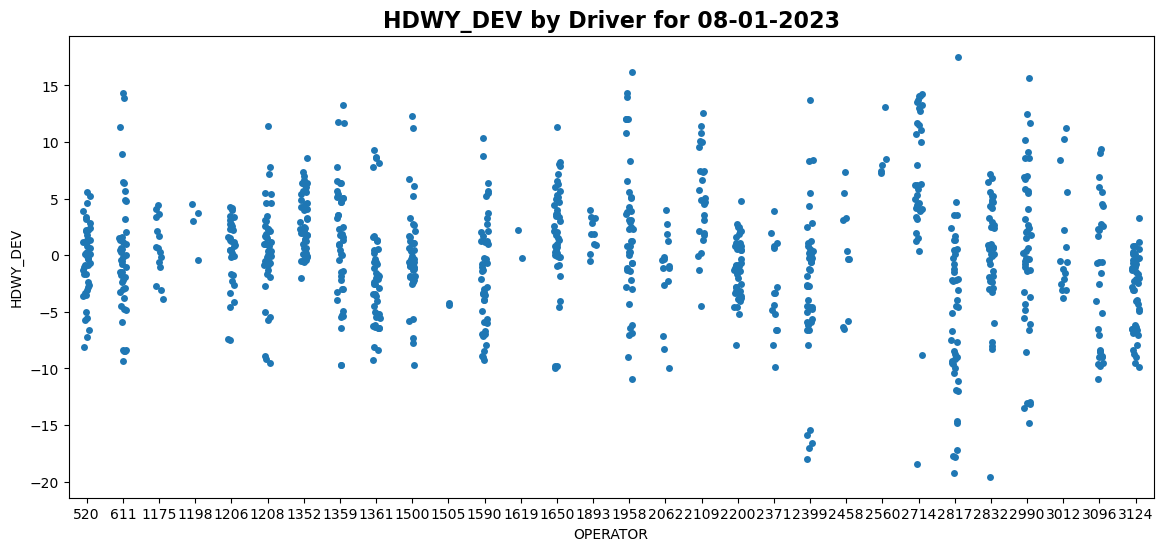

In [26]:
fontsize = 16

plt.subplots(figsize = (14, 6))
sns.stripplot(data = df55, x = 'OPERATOR', y = 'HDWY_DEV');
plt.title('HDWY_DEV by Driver for 08-01-2023', fontsize = fontsize, fontweight = 'bold');

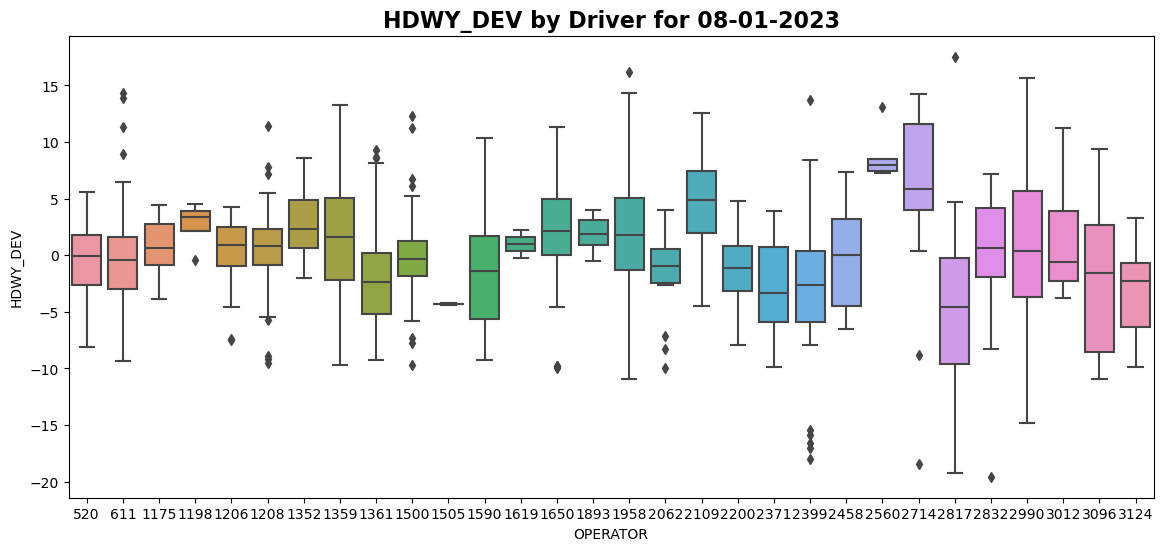

In [27]:
fontsize = 16

plt.subplots(figsize = (14, 6))
sns.boxplot(data = df55, x = 'OPERATOR', y = 'HDWY_DEV');
plt.title('HDWY_DEV by Driver for 08-01-2023', fontsize = fontsize, fontweight = 'bold');

In [28]:
#Q1 - How much impact does being late or too spaced out at the first stop have downstream?
#you can filter for rows where there's a gap on the first stop and then look and see how it affects the final stop
# >>>filter for when each trip edge is = 1, then check hdwy_dev when it equals 2.  
# >>>how to subdivide it all out?
#>>>Pivot table didn't seem to work.
#How to solve this problem?
    #1 aggregate by TRIP_ID (Possible pivot on ROUTE_ABBR and TRIP_ID)
    #2 Look in the TRIP_EDGE column for 1
    #3 Evaluate everything with a 0 or 2 in TRIP_ID
    #4 apply this to a small sample at first, say 08-01-2023
    #5 Compare to each other somehow?
#OR
    #1 Make a yes/no column for ontime vs. not
    #2 Make a column with % in downstream effects
    #3 compare columns (maybe logistic regression?)
    #4 maybe even predict???
#OR
    #1 Make a column with time that includes 
    #2 Make a column with % in downstream effects
    #3 compare columns (maybe linear regression?)
    #4 maybe even predict???
#0R
    # Above but set up as poisson?
#If data is not normally distributed, need to either normalize, or 

In [29]:
#Q2 - What is the impact of the layover at the start of the trip (the difference between the 
#first top arrival and departure time)? Does more layover lead to more stable headways 
#(lower values for % headway deviation)?

In [30]:
#Q3 - How closely does lateness (ADHERENCE) correlate to headway?
#(start with running pearson or other correlation?)

In [31]:
#Q4 - What is the relationship between distance or time travelled since the start of a 
#given trip and the headway deviation? Does headway become less stable the further along 
#the route the bus has travelled?


In [32]:
#Q5 - How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.


In [33]:
#Q6 - How does direction of travel, route, or location affect the headway and on-time performance?


In [34]:
#Q7 - How does time of day or day of week affect headway and on-time performance? 
#Can you detect an impact of school schedule on headway deviation 
#(for certain routes and at certain times of day)?


In [35]:

#Q8 - Does weather have any effect on headway or on-time performance? To help answer this
#question, the file bna_weather.csv contains historical weather data recorded at Nashville 
#International Airport.